In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.spatial.distance import euclidean
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit

from src.datasets import load_iris
from src.shadow_learn import FCM, SCM, SRFCM

In [2]:
c = 2
n = 10

In [3]:
centers = np.random.rand(c, n)
centers

array([[0.78213614, 0.12408352, 0.55106813, 0.11452023, 0.91264073,
        0.63198315, 0.05473772, 0.53351326, 0.68101766, 0.4975681 ],
       [0.11494411, 0.7365033 , 0.9245228 , 0.19858526, 0.45329227,
        0.7183502 , 0.36974118, 0.24240484, 0.28707274, 0.06803214]])

In [4]:
np.sum(centers, axis=0, keepdims=1)

array([[0.89708025, 0.86058682, 1.47559092, 0.3131055 , 1.365933  ,
        1.35033335, 0.4244789 , 0.7759181 , 0.9680904 , 0.56560024]])

In [5]:
centers / np.sum(centers, axis=0, keepdims=1)

array([[0.87186865, 0.14418478, 0.37345589, 0.36575607, 0.66814458,
        0.4680201 , 0.12895275, 0.68758966, 0.70346495, 0.87971692],
       [0.12813135, 0.85581522, 0.62654411, 0.63424393, 0.33185542,
        0.5319799 , 0.87104725, 0.31241034, 0.29653505, 0.12028308]])

In [6]:
np.finfo(np.float64).eps

2.220446049250313e-16

In [7]:
arr = [
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
]
arr = np.array(arr)
arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [8]:
d_k = arr[:, 2]
d_k

array([3, 8])

In [9]:
I_k, = np.where(d_k > 4)
I_k = set(I_k)
I_k

{1}

In [10]:
I_tilde_k = set([0,1,2,3]) - I_k
I_tilde_k

{0, 2, 3}

In [11]:
set(range(5))

{0, 1, 2, 3, 4}

# FCM

In [12]:
def distance(center, x):
    print(center, x)
    return euclidean(center, x)

def find_centers(X, mu, m, c):
    v = np.zeros(shape=(c, X.shape[1]))
    for i in range(c):
        for j in range(X.shape[1]):
            sum1 = 0
            for k in range(X.shape[0]):
                sum1 += (mu[i][k] ** m) * X[k][j]
                
            sum2 = 0
            for k in range(X.shape[0]):
                sum2 += mu[i][k] ** m
                
            v[i][j] = sum1 / sum2
    return np.array(v)

def update_mu(X, m, c, centers):
    distances = np.zeros(shape=(c, X.shape[0]))
    for i in range(c):
        for k in range(len(X)):
            distances[i][k] = distance(centers[i], X[k])
    distances = np.array(distances)
    
    '''
    I, I_tilde = [], []
    for k in range(len(X)):
        d_k = distances[:, k]
        I_k, = np.where(d_k == 0)
        I_k = set(I_k)
        I_tilde_k = set(range(c)) - I_k
        I[k] = I_k
        I_tilde[k] = I_tilde_k
    
    new_mu = []
    for k in range(len(X)):
        if len(I[k]) == 0:
            for i in range(c):
                new_mu[i][k] = 1 / sum([(distances[i][k] / distances[j][k]) ** (2 / (m - 1)) for j in range(c)])
        else:
            for i in I[k]:
                new_mu[i][k] = 0
            for i in I_tilde[k]:
    '''
    new_mu = np.zeros(shape=(c, X.shape[0]))            
    for i in range(c):
        for k in range(len(X)):
            new_mu[i][k] = 1 / sum([(distances[i][k] / distances[j][k]) ** (2 / (m - 1)) for j in range(c)])
            
    return new_mu

In [13]:
def fuzzy_c_means(X, c, m, epsilon, n_iter):
    mu = np.random.rand(c, X.shape[0])
    mu = mu / np.sum(mu, axis=0, keepdims=1)
    
    for l in range(n_iter):
        centers = find_centers(X, mu, m, c)
        new_mu = update_mu(X, m, c, centers)
        if np.linalg.norm(mu - new_mu) < epsilon:
            break
        mu = new_mu
            
    return new_mu, centers

In [14]:
X, y, data_labels, target, _ = load_iris(d='all', target='Iris-virginica')
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, data_labels):
    X_train = X[train_index]
    y_train = y[train_index]
    label_train = data_labels[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    label_test = data_labels[test_index]
    pca = PCA(n_components=2)
    pca.fit(X_train, y_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

[-0.14850162 -0.04678996] [-0.95648774 -0.75593049]
[-0.14850162 -0.04678996] [ 0.8992473  -0.61012278]
[-0.14850162 -0.04678996] [-2.61589638  0.56845044]
[-0.14850162 -0.04678996] [2.53025556 0.23872025]
[-0.14850162 -0.04678996] [ 0.25480674 -0.35782277]
[-0.14850162 -0.04678996] [1.91194401 0.1359692 ]
[-0.14850162 -0.04678996] [-2.71168346 -0.08228512]
[-0.14850162 -0.04678996] [-2.56684096  0.56032094]
[-0.14850162 -0.04678996] [-2.9341456 -0.5286222]
[-0.14850162 -0.04678996] [2.58582193 0.27716127]
[-0.14850162 -0.04678996] [1.62894056 0.21361157]
[-0.14850162 -0.04678996] [-2.75338779 -0.15239229]
[-0.14850162 -0.04678996] [-2.54565402 -0.12517105]
[-0.14850162 -0.04678996] [ 0.7725461 -0.1816634]
[-0.14850162 -0.04678996] [-0.11820159 -0.72528221]
[-0.14850162 -0.04678996] [2.58579581 0.50122218]
[-0.14850162 -0.04678996] [-2.50305723  0.1716572 ]
[-0.14850162 -0.04678996] [-2.67322154 -0.14749366]
[-0.14850162 -0.04678996] [2.38717185 0.27361726]
[-0.14850162 -0.04678996] [ 

[ 1.35990065 -0.07696356] [ 0.32023787 -0.10323948]
[ 1.35990065 -0.07696356] [ 1.29436795 -0.79464558]
[ 1.35990065 -0.07696356] [ 0.09366705 -0.33602417]
[ 1.35990065 -0.07696356] [-2.9014727  -0.93031407]
[ 1.35990065 -0.07696356] [-0.23925816 -0.70103429]
[ 1.35990065 -0.07696356] [1.86689269 0.02713986]
[ 1.35990065 -0.07696356] [ 0.85187221 -0.05195758]
[ 1.35990065 -0.07696356] [ 1.92902908 -0.20512083]
[ 1.35990065 -0.07696356] [-2.62249259  0.26356297]
[ 1.35990065 -0.07696356] [ 0.33251164 -0.29577481]
[ 1.35990065 -0.07696356] [-2.75987254  0.37662637]
[ 1.35990065 -0.07696356] [1.19130837 0.35962306]
[ 1.35990065 -0.07696356] [1.30003884 0.17638221]
[ 1.35990065 -0.07696356] [-0.06006249 -0.70973447]
[ 1.35990065 -0.07696356] [2.89345145 0.74156569]
[ 1.35990065 -0.07696356] [ 1.33358481 -0.44332817]
[ 1.35990065 -0.07696356] [0.6809201  0.10522702]
[ 1.35990065 -0.07696356] [2.10827707 0.13770726]
[ 1.35990065 -0.07696356] [ 1.14963691 -0.60334551]
[ 1.35990065 -0.07696356

Text(0.5, 1.0, 'Centers = 2')

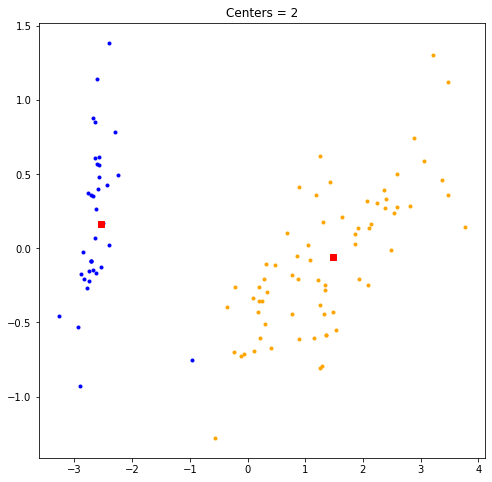

In [15]:
ncenters = 2
u, cntr = fuzzy_c_means(X_train, 2, 2, 0.005, 1000)

xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

In [16]:
fcm = FCM(c=2)
X, y, data_labels, target, _ = load_iris(d='all', target='Iris-virginica')
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, data_labels):
    X_train = X[train_index]
    y_train = y[train_index]
    label_train = data_labels[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    label_test = data_labels[test_index]
    pca = PCA(n_components=2)
    pca.fit(X_train, y_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

In [17]:
fcm.fit(X_train, y_train)

In [18]:
u, cntr = fcm.predict(X_train)

Text(0.5, 1.0, 'Centers = 2')

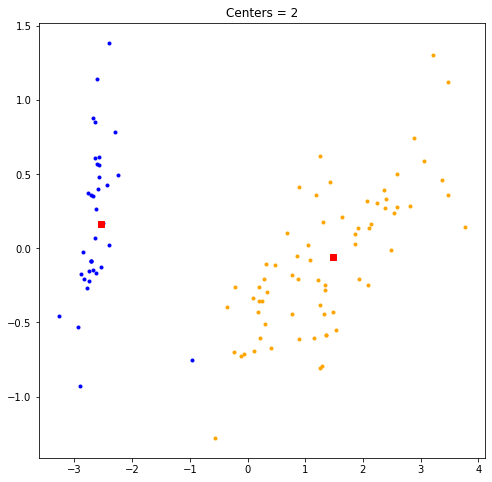

In [19]:
ncenters = 2
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

# SCM

In [20]:
ar1 = np.array([[0, 1], [1, 1], [2, 3]])
ar1    

array([[0, 1],
       [1, 1],
       [2, 3]])

In [21]:
ar1.sum()

8

In [43]:
def compute_thresholds(mu, c):
    lambdas = []
    for i in range(c):
        mu_i = mu[i]
        # il / 2 è sia su min che su max, v. articoli Pedrycz
        feasible_lambdas = np.linspace(np.min(mu_i), (np.min(mu_i) + np.max(mu_i)) / 2, 100)
        min_O = np.inf
        lambda_i = np.inf
        for feasible_lambda in feasible_lambdas:
            sum_less = sum([mu_ik for mu_ik in mu_i if mu_ik <= feasible_lambda])
            max_mu_i = max(mu_i)
            sum_greater = sum([max_mu_i - feasible_lambda for mu_ik in mu_i if mu_ik >= (max_mu_i - feasible_lambda)])
            res = abs(sum_less + sum_greater - len([1 for mu_ik in mu_i if feasible_lambda < mu_ik < (max_mu_i - feasible_lambda)]))
            if res < min_O:
                min_O = res
                lambda_i = feasible_lambda
        lambdas.append(lambda_i)
    return lambdas

def compute_thresholds2(mu, c):
    lambdas = []
    for i in range(c):
        mu_i = mu[i]
        feasible_lambdas = np.linspace(0.001, 0.5, 100)
        min_O = np.inf
        lambda_i = np.inf
        for feasible_lambda in feasible_lambdas:
            sum_less = sum([mu_ik for mu_ik in mu_i if mu_ik <= feasible_lambda])
            sum_greater = sum([1 - mu_ik for mu_ik in mu_i if mu_ik >= (1 - feasible_lambda)])
            res = abs(sum_less + sum_greater - len([1 for mu_ik in mu_i if feasible_lambda < mu_ik < (1 - feasible_lambda)]))
            print(i, feasible_lambda, res, min_O)
            if res < min_O:
                min_O = res
                lambda_i = feasible_lambda
        lambdas.append(lambda_i)
    return lambdas

def update_means(X, mu, c, lambdas, m):
    v = np.zeros(shape=(c, X.shape[1]))
    for i in range(c):
        max_mu_i = max(mu[i])
        
        for j in range(X.shape[1]):
            sum1 = np.array([X[k][j] for k, mu_ik in enumerate(mu[i]) if mu_ik >= (max_mu_i - lambdas[i])]).sum()
            sum2 = np.array([X[k][j] * (mu_ik ** m) 
                             for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
            sum3 = np.array([X[k][j] * (mu_ik ** (m ** m)) 
                             for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
            phi = len([1 for mu_ik in mu[i] if  mu_ik >= (max_mu_i - lambdas[i])])
            eta = np.array([(mu_ik ** m) 
                             for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
            psi = np.array([(mu_ik ** (m ** m)) 
                             for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
            v[i][j] = (sum1 + sum2 + sum3) / (phi + eta + psi)
        
        '''
        sum1 = np.array([X[k] for k, mu_ik in enumerate(mu[i]) if mu_ik >= (max_mu_i - lambdas[i])]).sum()
        sum2 = np.array([X[k] * (mu_ik ** m) 
                         for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
        sum3 = np.array([X[k] * (mu_ik ** (m ** m)) 
                         for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
        phi = len([1 for mu_ik in mu[i] if  mu_ik >= (max_mu_i - lambdas[i])])
        eta = np.array([(mu_ik ** m) 
                         for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
        psi = np.array([(mu_ik ** (m ** m)) 
                         for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
        v[i] = (sum1 + sum2 + sum3) / (phi + eta + psi)
        '''
    
    return v

def update_means2(X, mu, c, lambdas, m):
    v = np.zeros(shape=(c, X.shape[1]))
    for i in range(c):
    
        for j in range(X.shape[1]):
            sum1 = np.array([X[k][j] for k, mu_ik in enumerate(mu[i]) if mu_ik >= (1 - lambdas[i])]).sum()
            sum2 = np.array([X[k][j] * (mu_ik ** m) 
                             for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (1 - lambdas[i])]).sum()
            sum3 = np.array([X[k][j] * (mu_ik ** (m ** m)) 
                             for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
            phi = len([1 for mu_ik in mu[i] if  mu_ik >= (1 - lambdas[i])])
            eta = np.array([(mu_ik ** m) 
                             for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (1 - lambdas[i])]).sum()
            psi = np.array([(mu_ik ** (m ** m)) 
                             for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
            v[i][j] = (sum1 + sum2 + sum3) / (phi + eta + psi)
        
        '''
        sum1 = np.array([X[k] for k, mu_ik in enumerate(mu[i]) if mu_ik >= (max_mu_i - lambdas[i])]).sum()
        sum2 = np.array([X[k] * (mu_ik ** m) 
                         for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
        sum3 = np.array([X[k] * (mu_ik ** (m ** m)) 
                         for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
        phi = len([1 for mu_ik in mu[i] if  mu_ik >= (max_mu_i - lambdas[i])])
        eta = np.array([(mu_ik ** m) 
                         for k, mu_ik in enumerate(mu[i]) if lambdas[i] < mu_ik < (max_mu_i - lambdas[i])]).sum()
        psi = np.array([(mu_ik ** (m ** m)) 
                         for k, mu_ik in enumerate(mu[i]) if mu_ik <= lambdas[i]]).sum()
        v[i] = (sum1 + sum2 + sum3) / (phi + eta + psi)
        '''
    
    return v

def shadowed_c_means(X, c, m, epsilon, n_iter):
    mu = np.random.rand(c, X.shape[0])
    mu = mu / np.sum(mu, axis=0, keepdims=1)
    centers = find_centers(X, mu, m, c)
    
    for l in range(n_iter):
        print(l)
        new_mu = update_mu(X, m, c, centers)
        lambdas = compute_thresholds(new_mu, c)
        centers = update_means(X, new_mu, c, lambdas, m)
        if np.linalg.norm(mu - new_mu) < epsilon:
            break
        mu = new_mu
            
    return new_mu, centers, lambdas

In [44]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [45]:
X, y, data_labels, target, _ = load_iris(d='all', target='Iris-virginica')
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, data_labels):
    X_train = X[train_index]
    y_train = y[train_index]
    label_train = data_labels[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    label_test = data_labels[test_index]
    pca = PCA(n_components=2)
    pca.fit(X_train, y_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

In [46]:
ncenters = 3
mu, cntr, lambdas = shadowed_c_means(X_train, 3, 2, 0.005, 1000)
mu, cntr, lambdas

0
[ 0.24377244 -0.01837304] [-0.95648774 -0.75593049]
[ 0.24377244 -0.01837304] [ 0.8992473  -0.61012278]
[ 0.24377244 -0.01837304] [-2.61589638  0.56845044]
[ 0.24377244 -0.01837304] [2.53025556 0.23872025]
[ 0.24377244 -0.01837304] [ 0.25480674 -0.35782277]
[ 0.24377244 -0.01837304] [1.91194401 0.1359692 ]
[ 0.24377244 -0.01837304] [-2.71168346 -0.08228512]
[ 0.24377244 -0.01837304] [-2.56684096  0.56032094]
[ 0.24377244 -0.01837304] [-2.9341456 -0.5286222]
[ 0.24377244 -0.01837304] [2.58582193 0.27716127]
[ 0.24377244 -0.01837304] [1.62894056 0.21361157]
[ 0.24377244 -0.01837304] [-2.75338779 -0.15239229]
[ 0.24377244 -0.01837304] [-2.54565402 -0.12517105]
[ 0.24377244 -0.01837304] [ 0.7725461 -0.1816634]
[ 0.24377244 -0.01837304] [-0.11820159 -0.72528221]
[ 0.24377244 -0.01837304] [2.58579581 0.50122218]
[ 0.24377244 -0.01837304] [-2.50305723  0.1716572 ]
[ 0.24377244 -0.01837304] [-2.67322154 -0.14749366]
[ 0.24377244 -0.01837304] [2.38717185 0.27361726]
[ 0.24377244 -0.01837304] 

[ 1.59008013 -0.07733847] [-0.95648774 -0.75593049]
[ 1.59008013 -0.07733847] [ 0.8992473  -0.61012278]
[ 1.59008013 -0.07733847] [-2.61589638  0.56845044]
[ 1.59008013 -0.07733847] [2.53025556 0.23872025]
[ 1.59008013 -0.07733847] [ 0.25480674 -0.35782277]
[ 1.59008013 -0.07733847] [1.91194401 0.1359692 ]
[ 1.59008013 -0.07733847] [-2.71168346 -0.08228512]
[ 1.59008013 -0.07733847] [-2.56684096  0.56032094]
[ 1.59008013 -0.07733847] [-2.9341456 -0.5286222]
[ 1.59008013 -0.07733847] [2.58582193 0.27716127]
[ 1.59008013 -0.07733847] [1.62894056 0.21361157]
[ 1.59008013 -0.07733847] [-2.75338779 -0.15239229]
[ 1.59008013 -0.07733847] [-2.54565402 -0.12517105]
[ 1.59008013 -0.07733847] [ 0.7725461 -0.1816634]
[ 1.59008013 -0.07733847] [-0.11820159 -0.72528221]
[ 1.59008013 -0.07733847] [2.58579581 0.50122218]
[ 1.59008013 -0.07733847] [-2.50305723  0.1716572 ]
[ 1.59008013 -0.07733847] [-2.67322154 -0.14749366]
[ 1.59008013 -0.07733847] [2.38717185 0.27361726]
[ 1.59008013 -0.07733847] [ 

[-2.64815929  0.19371551] [ 1.53899475 -0.54876247]
[-2.64815929  0.19371551] [-2.30426957  0.78504643]
[-2.64815929  0.19371551] [ 1.36634297 -0.58670309]
[-2.64815929  0.19371551] [-0.56807468 -1.27959679]
[-2.64815929  0.19371551] [2.24316956 0.3058541 ]
[-2.64815929  0.19371551] [2.81150029 0.28322489]
[-2.64815929  0.19371551] [-2.5693023   0.61747027]
[-2.64815929  0.19371551] [ 0.87962924 -0.2085012 ]
[-2.64815929  0.19371551] [ 0.41343276 -0.6740003 ]
[-2.64815929  0.19371551] [1.26082205 0.62471488]
[-2.64815929  0.19371551] [ 1.25503977 -0.38056895]
[-2.64815929  0.19371551] [ 0.47240526 -0.11445926]
[-2.64815929  0.19371551] [-2.5922219   0.40139829]
[-2.64815929  0.19371551] [2.07794732 0.31714417]
[-2.64815929  0.19371551] [ 0.18607413 -0.43044955]
[-2.64815929  0.19371551] [ 1.36634297 -0.58670309]
[-2.64815929  0.19371551] [-2.65030194  0.06857833]
[-2.64815929  0.19371551] [-2.71168346 -0.08228512]
[-2.64815929  0.19371551] [-0.34882876 -0.39298625]
[-2.64815929  0.1937

[-2.6517746   0.19248638] [1.86689269 0.02713986]
[-2.6517746   0.19248638] [ 0.85187221 -0.05195758]
[-2.6517746   0.19248638] [ 1.92902908 -0.20512083]
[-2.6517746   0.19248638] [-2.62249259  0.26356297]
[-2.6517746   0.19248638] [ 0.33251164 -0.29577481]
[-2.6517746   0.19248638] [-2.75987254  0.37662637]
[-2.6517746   0.19248638] [1.19130837 0.35962306]
[-2.6517746   0.19248638] [1.30003884 0.17638221]
[-2.6517746   0.19248638] [-0.06006249 -0.70973447]
[-2.6517746   0.19248638] [2.89345145 0.74156569]
[-2.6517746   0.19248638] [ 1.33358481 -0.44332817]
[-2.6517746   0.19248638] [0.6809201  0.10522702]
[-2.6517746   0.19248638] [2.10827707 0.13770726]
[-2.6517746   0.19248638] [ 1.14963691 -0.60334551]
[-2.6517746   0.19248638] [-2.71168346 -0.08228512]
[-2.6517746   0.19248638] [2.39776535 0.33069631]
[-2.6517746   0.19248638] [1.05306209 0.02190446]
[-2.6517746   0.19248638] [ 0.20248277 -0.26094808]
[-2.6517746   0.19248638] [3.76351805 0.14380102]
[-2.6517746   0.19248638] [-2.

[ 0.50966379 -0.37003005] [-2.71168346 -0.08228512]
[ 0.50966379 -0.37003005] [2.39776535 0.33069631]
[ 0.50966379 -0.37003005] [1.05306209 0.02190446]
[ 0.50966379 -0.37003005] [ 0.20248277 -0.26094808]
[ 0.50966379 -0.37003005] [3.76351805 0.14380102]
[ 0.50966379 -0.37003005] [-2.67232901  0.87887751]
[ 0.50966379 -0.37003005] [1.86943248 0.09745789]
[ 0.50966379 -0.37003005] [ 1.34591091 -0.28433523]
[ 0.50966379 -0.37003005] [ 0.77246085 -0.43998034]
[ 0.50966379 -0.37003005] [-2.62824867 -0.16613168]
[ 0.50966379 -0.37003005] [3.46919241 1.12307766]
[ 0.50966379 -0.37003005] [2.13273262 0.16312015]
[ 0.50966379 -0.37003005] [-2.23967184  0.49563641]
[ 0.50966379 -0.37003005] [-3.27028702 -0.45335885]
[ 0.50966379 -0.37003005] [ 1.21831045 -0.21344651]
[ 0.50966379 -0.37003005] [2.35838486 0.39324467]
[ 0.50966379 -0.37003005] [ 1.53899475 -0.54876247]
[ 0.50966379 -0.37003005] [-2.30426957  0.78504643]
[ 0.50966379 -0.37003005] [ 1.36634297 -0.58670309]
[ 0.50966379 -0.37003005] 

[ 0.56427433 -0.36248993] [2.58579581 0.50122218]
[ 0.56427433 -0.36248993] [-2.50305723  0.1716572 ]
[ 0.56427433 -0.36248993] [-2.67322154 -0.14749366]
[ 0.56427433 -0.36248993] [2.38717185 0.27361726]
[ 0.56427433 -0.36248993] [ 1.07604075 -0.07929578]
[ 0.56427433 -0.36248993] [-2.4376261   0.42624049]
[ 0.56427433 -0.36248993] [ 1.34833932 -0.24827324]
[ 0.56427433 -0.36248993] [3.36932278 0.46183358]
[ 0.56427433 -0.36248993] [3.47070216 0.35682939]
[ 0.56427433 -0.36248993] [ 0.28915997 -0.20947893]
[ 0.56427433 -0.36248993] [-2.85965691 -0.02630077]
[ 0.56427433 -0.36248993] [-2.57254471  0.48215456]
[ 0.56427433 -0.36248993] [-2.64449354  0.84980124]
[ 0.56427433 -0.36248993] [1.43666392 0.44644295]
[ 0.56427433 -0.36248993] [ 0.11656045 -0.69554136]
[ 0.56427433 -0.36248993] [-2.39827166  1.38740312]
[ 0.56427433 -0.36248993] [-2.6788991   0.34992913]
[ 0.56427433 -0.36248993] [ 0.19177789 -0.35228316]
[ 0.56427433 -0.36248993] [-0.2154461  -0.25824123]
[ 0.56427433 -0.362489

[2.52887359 0.3326223 ] [-2.62249259  0.26356297]
[2.52887359 0.3326223 ] [ 0.33251164 -0.29577481]
[2.52887359 0.3326223 ] [-2.75987254  0.37662637]
[2.52887359 0.3326223 ] [1.19130837 0.35962306]
[2.52887359 0.3326223 ] [1.30003884 0.17638221]
[2.52887359 0.3326223 ] [-0.06006249 -0.70973447]
[2.52887359 0.3326223 ] [2.89345145 0.74156569]
[2.52887359 0.3326223 ] [ 1.33358481 -0.44332817]
[2.52887359 0.3326223 ] [0.6809201  0.10522702]
[2.52887359 0.3326223 ] [2.10827707 0.13770726]
[2.52887359 0.3326223 ] [ 1.14963691 -0.60334551]
[2.52887359 0.3326223 ] [-2.71168346 -0.08228512]
[2.52887359 0.3326223 ] [2.39776535 0.33069631]
[2.52887359 0.3326223 ] [1.05306209 0.02190446]
[2.52887359 0.3326223 ] [ 0.20248277 -0.26094808]
[2.52887359 0.3326223 ] [3.76351805 0.14380102]
[2.52887359 0.3326223 ] [-2.67232901  0.87887751]
[2.52887359 0.3326223 ] [1.86943248 0.09745789]
[2.52887359 0.3326223 ] [ 1.34591091 -0.28433523]
[2.52887359 0.3326223 ] [ 0.77246085 -0.43998034]
[2.52887359 0.3326

[2.54581531 0.33887709] [-2.4376261   0.42624049]
[2.54581531 0.33887709] [ 1.34833932 -0.24827324]
[2.54581531 0.33887709] [3.36932278 0.46183358]
[2.54581531 0.33887709] [3.47070216 0.35682939]
[2.54581531 0.33887709] [ 0.28915997 -0.20947893]
[2.54581531 0.33887709] [-2.85965691 -0.02630077]
[2.54581531 0.33887709] [-2.57254471  0.48215456]
[2.54581531 0.33887709] [-2.64449354  0.84980124]
[2.54581531 0.33887709] [1.43666392 0.44644295]
[2.54581531 0.33887709] [ 0.11656045 -0.69554136]
[2.54581531 0.33887709] [-2.39827166  1.38740312]
[2.54581531 0.33887709] [-2.6788991   0.34992913]
[2.54581531 0.33887709] [ 0.19177789 -0.35228316]
[2.54581531 0.33887709] [-0.2154461  -0.25824123]
[2.54581531 0.33887709] [-2.82701014 -0.20393173]
[2.54581531 0.33887709] [-2.75500899 -0.22005015]
[2.54581531 0.33887709] [0.90013983 0.41624838]
[2.54581531 0.33887709] [ 1.48409806 -0.42899449]
[2.54581531 0.33887709] [3.21726685 1.30695948]
[2.54581531 0.33887709] [-2.71489967  0.35798834]
[2.5458153

15
[2.5546551  0.34328248] [-0.95648774 -0.75593049]
[2.5546551  0.34328248] [ 0.8992473  -0.61012278]
[2.5546551  0.34328248] [-2.61589638  0.56845044]
[2.5546551  0.34328248] [2.53025556 0.23872025]
[2.5546551  0.34328248] [ 0.25480674 -0.35782277]
[2.5546551  0.34328248] [1.91194401 0.1359692 ]
[2.5546551  0.34328248] [-2.71168346 -0.08228512]
[2.5546551  0.34328248] [-2.56684096  0.56032094]
[2.5546551  0.34328248] [-2.9341456 -0.5286222]
[2.5546551  0.34328248] [2.58582193 0.27716127]
[2.5546551  0.34328248] [1.62894056 0.21361157]
[2.5546551  0.34328248] [-2.75338779 -0.15239229]
[2.5546551  0.34328248] [-2.54565402 -0.12517105]
[2.5546551  0.34328248] [ 0.7725461 -0.1816634]
[2.5546551  0.34328248] [-0.11820159 -0.72528221]
[2.5546551  0.34328248] [2.58579581 0.50122218]
[2.5546551  0.34328248] [-2.50305723  0.1716572 ]
[2.5546551  0.34328248] [-2.67322154 -0.14749366]
[2.5546551  0.34328248] [2.38717185 0.27361726]
[2.5546551  0.34328248] [ 1.07604075 -0.07929578]
[2.5546551  0

17
[2.55934734 0.34512426] [-0.95648774 -0.75593049]
[2.55934734 0.34512426] [ 0.8992473  -0.61012278]
[2.55934734 0.34512426] [-2.61589638  0.56845044]
[2.55934734 0.34512426] [2.53025556 0.23872025]
[2.55934734 0.34512426] [ 0.25480674 -0.35782277]
[2.55934734 0.34512426] [1.91194401 0.1359692 ]
[2.55934734 0.34512426] [-2.71168346 -0.08228512]
[2.55934734 0.34512426] [-2.56684096  0.56032094]
[2.55934734 0.34512426] [-2.9341456 -0.5286222]
[2.55934734 0.34512426] [2.58582193 0.27716127]
[2.55934734 0.34512426] [1.62894056 0.21361157]
[2.55934734 0.34512426] [-2.75338779 -0.15239229]
[2.55934734 0.34512426] [-2.54565402 -0.12517105]
[2.55934734 0.34512426] [ 0.7725461 -0.1816634]
[2.55934734 0.34512426] [-0.11820159 -0.72528221]
[2.55934734 0.34512426] [2.58579581 0.50122218]
[2.55934734 0.34512426] [-2.50305723  0.1716572 ]
[2.55934734 0.34512426] [-2.67322154 -0.14749366]
[2.55934734 0.34512426] [2.38717185 0.27361726]
[2.55934734 0.34512426] [ 1.07604075 -0.07929578]
[2.55934734 0

[-2.64550263  0.18932653] [ 0.47240526 -0.11445926]
[-2.64550263  0.18932653] [-2.5922219   0.40139829]
[-2.64550263  0.18932653] [2.07794732 0.31714417]
[-2.64550263  0.18932653] [ 0.18607413 -0.43044955]
[-2.64550263  0.18932653] [ 1.36634297 -0.58670309]
[-2.64550263  0.18932653] [-2.65030194  0.06857833]
[-2.64550263  0.18932653] [-2.71168346 -0.08228512]
[-2.64550263  0.18932653] [-0.34882876 -0.39298625]
[-2.64550263  0.18932653] [-2.61587018  1.14403961]
[-2.64550263  0.18932653] [ 0.30959204 -0.51184679]
[-2.64550263  0.18932653] [-2.78854823 -0.26914027]
19
[2.56097731 0.34575577] [-0.95648774 -0.75593049]
[2.56097731 0.34575577] [ 0.8992473  -0.61012278]
[2.56097731 0.34575577] [-2.61589638  0.56845044]
[2.56097731 0.34575577] [2.53025556 0.23872025]
[2.56097731 0.34575577] [ 0.25480674 -0.35782277]
[2.56097731 0.34575577] [1.91194401 0.1359692 ]
[2.56097731 0.34575577] [-2.71168346 -0.08228512]
[2.56097731 0.34575577] [-2.56684096  0.56032094]
[2.56097731 0.34575577] [-2.934

(array([[1.02907243e-01, 3.73902890e-02, 5.29034301e-03, 9.96428374e-01,
         2.27205886e-02, 7.88221791e-01, 2.76561654e-03, 5.36109926e-03,
         1.81337848e-02, 9.98550542e-01, 5.81784047e-01, 4.43728020e-03,
         4.07858492e-03, 1.38642455e-02, 7.08212967e-02, 9.93706251e-01,
         7.99838426e-04, 4.07256879e-03, 9.88586924e-01, 1.01554439e-01,
         3.91999321e-03, 2.20477655e-01, 9.09192638e-01, 8.94101769e-01,
         2.31966932e-02, 3.09564457e-03, 3.41323327e-03, 1.51624446e-02,
         4.84188407e-01, 4.89922802e-02, 4.93273143e-02, 9.77010015e-04,
         2.92358920e-02, 7.34153195e-02, 6.25717860e-03, 6.14819610e-03,
         1.84612059e-01, 2.88606206e-01, 8.46522727e-01, 1.19047946e-03,
         7.69988249e-01, 6.15696142e-03, 1.60006637e-01, 6.44058248e-03,
         9.59463507e-01, 3.43217926e-02, 3.65274709e-03, 9.49111097e-01,
         2.78964865e-02, 1.76742965e-01, 3.99568340e-02, 3.66067616e-02,
         7.93619470e-02, 7.27061959e-01, 4.25808995

Text(0.5, 1.0, 'Centers = 3')

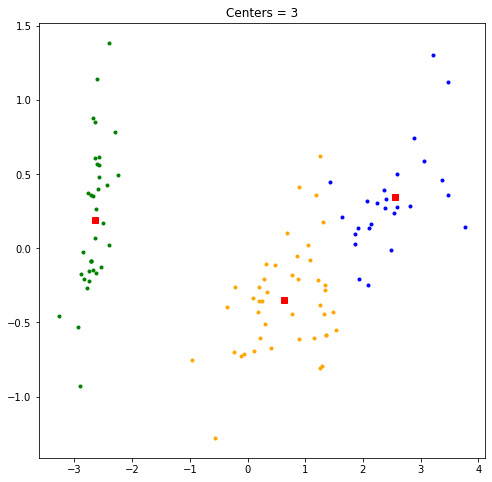

In [47]:
cluster_membership = np.argmax(mu, axis=0)
mu0 = mu[0]
max_mu0 = max(mu0)
# First core
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

In [48]:
cluster_membership

array([1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2], dtype=int64)

Text(0.5, 1.0, 'Centers = 3')

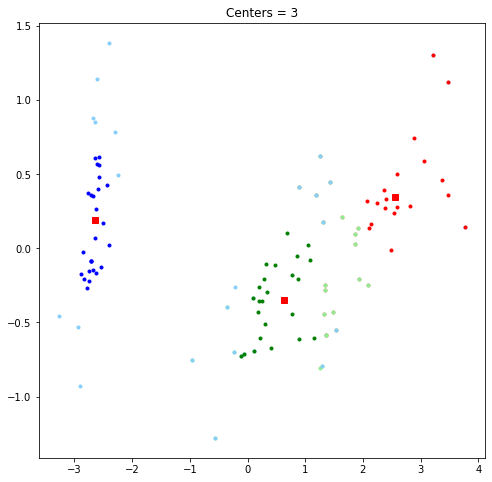

In [49]:
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)

for nc, col in zip(list(range(ncenters)), ['lightcoral', 'lightgreen', 'lightskyblue']):
    mu_i = mu[nc]
    max_mu_i = max(mu_i)
    indices, = np.where((lambdas[nc] < mu_i) & (mu_i < (max_mu_i - lambdas[nc])))
    ax.plot(xpts[indices],
            ypts[indices], '.', color=col)
    
# Cores
for nc, col in zip(list(range(ncenters)), ['red', 'green', 'blue']):
    mu_i = mu[nc]
    ax.plot(xpts[mu_i >= (1 - lambdas[nc])],
            ypts[mu_i >= (1 - lambdas[nc])], '.', color=col)


# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

In [53]:
scm = SCM(c=3)
scm.fit(X_train, y_train)

In [54]:
mu, cntr, lambdas = scm.predict(X_train)

Text(0.5, 1.0, 'Centers = 3')

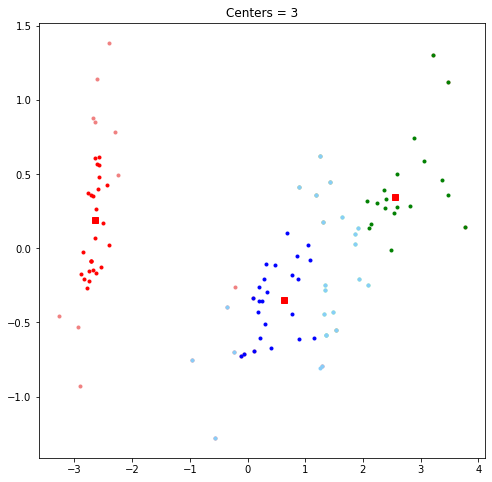

In [55]:
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)

for nc, col in zip(list(range(ncenters)), ['lightcoral', 'lightgreen', 'lightskyblue']):
    mu_i = mu[nc]
    max_mu_i = max(mu_i)
    indices, = np.where((lambdas[nc] < mu_i) & (mu_i < (max_mu_i - lambdas[nc])))
    ax.plot(xpts[indices],
            ypts[indices], '.', color=col)
    
# Cores
for nc, col in zip(list(range(ncenters)), ['red', 'green', 'blue']):
    mu_i = mu[nc]
    ax.plot(xpts[mu_i >= (1 - lambdas[nc])],
            ypts[mu_i >= (1 - lambdas[nc])], '.', color=col)


# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

# SRFCM

In [56]:
def compute_bounds(X, mu, c, alphas):
    lower_bounds = []
    boundary_regions = []
    for i in range(c):
        mu_i = mu[i]
        max_mu_i = max(mu_i)
        lower_bound = [k for k in range(len(X)) if mu_i[k] >= (max_mu_i - alphas[i])]
        boundary_region = [k for k in range(len(X)) if alphas[i] < mu_i[k] < (max_mu_i - alphas[i])]
        lower_bounds.append(lower_bound)
        boundary_regions.append(boundary_region)
        
    return lower_bounds, boundary_regions
        
def compute_prototypes(X, mu, c, m, lower_bounds, boundary_regions, wl, wb):
    prototypes = np.zeros(shape=(c, X.shape[1]))
    A2s = np.zeros(shape=(c, X.shape[1]))
    B2s = np.zeros(shape=(c, X.shape[1]))
    for i in range(c):
        mu_i = mu[i]
        for j in range(X.shape[1]):
            if len(lower_bounds[i]) != 0 and len(boundary_regions[i]) != 0:
                A2s[i][j] = np.array([(mu_i[k] ** m) * X[k][j] for k in lower_bounds[i]]).sum() / np.array([(mu_i[k] ** m) for k in lower_bounds[i]]).sum()
                B2s[i][j] = np.array([(mu_i[k] ** m) * X[k][j] for k in boundary_regions[i]]).sum() / np.array([(mu_i[k] ** m) for k in boundary_regions[i]]).sum()
                prototypes[i][j] = wl * A2s[i][j] + wb * B2s[i][j]
            elif len(lower_bounds[i]) == 0:
                B2s[i][j] = np.array([(mu_i[k] ** m) * X[k][j] for k in boundary_regions[i]]).sum() / np.array([(mu_i[k] ** m) for k in boundary_regions[i]]).sum()
                prototypes[i][j] = B2s[i][j]
            else:
                A2s[i][j] = np.array([(mu_i[k] ** m) * X[k][j] for k in lower_bounds[i]]).sum() / np.array([(mu_i[k] ** m) for k in lower_bounds[i]]).sum()
                prototypes[i][j] = A2s[i][j]
                
    return prototypes
                
    
def srfcm(X, c, m=2, epsilon=0.005, n_iter=1000, wl=0.95, wb=0.05):
    mu = np.random.rand(c, X.shape[0])
    mu = mu / np.sum(mu, axis=0, keepdims=1)
    centers = find_centers(X, mu, m, c)
    
    for l in range(n_iter):
        print(l)
        alphas = compute_thresholds(mu, c)
        lower_bounds, boundary_regions = compute_bounds(X, mu, c, alphas)
        centers = compute_prototypes(X, mu, c, m, lower_bounds, boundary_regions, wl, wb)
        new_mu = update_mu(X, m, c, centers)
        if np.linalg.norm(mu - new_mu) < epsilon:
            break
        mu = new_mu
            
    return new_mu, centers, alphas

def srfcm_predict(X_test, c, centers, m=2, epsilon=0.005, n_iter=1000, wl=0.95, wb=0.05):
    mu = np.random.rand(c, X_test.shape[0])
    mu = mu / np.sum(mu, axis=0, keepdims=1)
    
    for l in range(n_iter):
        print(l)
        alphas = compute_thresholds(mu, c)
        print(X_test)
        print(centers)
        new_mu = update_mu(X_test, m, c, centers)
        if np.linalg.norm(mu - new_mu) < epsilon:
            break
        mu = new_mu
            
    return new_mu, centers, alphas

In [57]:
X, y, data_labels, target, _ = load_iris(d='all', target='Iris-virginica')
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(X, data_labels):
    X_train = X[train_index]
    y_train = y[train_index]
    label_train = data_labels[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    label_test = data_labels[test_index]
    pca = PCA(n_components=2)
    pca.fit(X_train, y_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

In [58]:
ncenters = 3
mu, cntr, alphas = srfcm(X_train, 3)
mu, cntr, alphas

0
[ 0.44579634 -0.00547124] [-0.95648774 -0.75593049]
[ 0.44579634 -0.00547124] [ 0.8992473  -0.61012278]
[ 0.44579634 -0.00547124] [-2.61589638  0.56845044]
[ 0.44579634 -0.00547124] [2.53025556 0.23872025]
[ 0.44579634 -0.00547124] [ 0.25480674 -0.35782277]
[ 0.44579634 -0.00547124] [1.91194401 0.1359692 ]
[ 0.44579634 -0.00547124] [-2.71168346 -0.08228512]
[ 0.44579634 -0.00547124] [-2.56684096  0.56032094]
[ 0.44579634 -0.00547124] [-2.9341456 -0.5286222]
[ 0.44579634 -0.00547124] [2.58582193 0.27716127]
[ 0.44579634 -0.00547124] [1.62894056 0.21361157]
[ 0.44579634 -0.00547124] [-2.75338779 -0.15239229]
[ 0.44579634 -0.00547124] [-2.54565402 -0.12517105]
[ 0.44579634 -0.00547124] [ 0.7725461 -0.1816634]
[ 0.44579634 -0.00547124] [-0.11820159 -0.72528221]
[ 0.44579634 -0.00547124] [2.58579581 0.50122218]
[ 0.44579634 -0.00547124] [-2.50305723  0.1716572 ]
[ 0.44579634 -0.00547124] [-2.67322154 -0.14749366]
[ 0.44579634 -0.00547124] [2.38717185 0.27361726]
[ 0.44579634 -0.00547124] 

[ 0.56201771 -0.32299444] [ 2.4918527  -0.01334344]
[ 0.56201771 -0.32299444] [ 0.21872091 -0.60808051]
[ 0.56201771 -0.32299444] [-2.39513397  0.02001221]
[ 0.56201771 -0.32299444] [3.05366575 0.58625733]
[ 0.56201771 -0.32299444] [ 0.32023787 -0.10323948]
[ 0.56201771 -0.32299444] [ 1.29436795 -0.79464558]
[ 0.56201771 -0.32299444] [ 0.09366705 -0.33602417]
[ 0.56201771 -0.32299444] [-2.9014727  -0.93031407]
[ 0.56201771 -0.32299444] [-0.23925816 -0.70103429]
[ 0.56201771 -0.32299444] [1.86689269 0.02713986]
[ 0.56201771 -0.32299444] [ 0.85187221 -0.05195758]
[ 0.56201771 -0.32299444] [ 1.92902908 -0.20512083]
[ 0.56201771 -0.32299444] [-2.62249259  0.26356297]
[ 0.56201771 -0.32299444] [ 0.33251164 -0.29577481]
[ 0.56201771 -0.32299444] [-2.75987254  0.37662637]
[ 0.56201771 -0.32299444] [1.19130837 0.35962306]
[ 0.56201771 -0.32299444] [1.30003884 0.17638221]
[ 0.56201771 -0.32299444] [-0.06006249 -0.70973447]
[ 0.56201771 -0.32299444] [2.89345145 0.74156569]
[ 0.56201771 -0.322994

[ 0.32952537 -0.38210507] [-0.95648774 -0.75593049]
[ 0.32952537 -0.38210507] [ 0.8992473  -0.61012278]
[ 0.32952537 -0.38210507] [-2.61589638  0.56845044]
[ 0.32952537 -0.38210507] [2.53025556 0.23872025]
[ 0.32952537 -0.38210507] [ 0.25480674 -0.35782277]
[ 0.32952537 -0.38210507] [1.91194401 0.1359692 ]
[ 0.32952537 -0.38210507] [-2.71168346 -0.08228512]
[ 0.32952537 -0.38210507] [-2.56684096  0.56032094]
[ 0.32952537 -0.38210507] [-2.9341456 -0.5286222]
[ 0.32952537 -0.38210507] [2.58582193 0.27716127]
[ 0.32952537 -0.38210507] [1.62894056 0.21361157]
[ 0.32952537 -0.38210507] [-2.75338779 -0.15239229]
[ 0.32952537 -0.38210507] [-2.54565402 -0.12517105]
[ 0.32952537 -0.38210507] [ 0.7725461 -0.1816634]
[ 0.32952537 -0.38210507] [-0.11820159 -0.72528221]
[ 0.32952537 -0.38210507] [2.58579581 0.50122218]
[ 0.32952537 -0.38210507] [-2.50305723  0.1716572 ]
[ 0.32952537 -0.38210507] [-2.67322154 -0.14749366]
[ 0.32952537 -0.38210507] [2.38717185 0.27361726]
[ 0.32952537 -0.38210507] [ 

[-2.65898921  0.14671437] [ 0.41343276 -0.6740003 ]
[-2.65898921  0.14671437] [1.26082205 0.62471488]
[-2.65898921  0.14671437] [ 1.25503977 -0.38056895]
[-2.65898921  0.14671437] [ 0.47240526 -0.11445926]
[-2.65898921  0.14671437] [-2.5922219   0.40139829]
[-2.65898921  0.14671437] [2.07794732 0.31714417]
[-2.65898921  0.14671437] [ 0.18607413 -0.43044955]
[-2.65898921  0.14671437] [ 1.36634297 -0.58670309]
[-2.65898921  0.14671437] [-2.65030194  0.06857833]
[-2.65898921  0.14671437] [-2.71168346 -0.08228512]
[-2.65898921  0.14671437] [-0.34882876 -0.39298625]
[-2.65898921  0.14671437] [-2.61587018  1.14403961]
[-2.65898921  0.14671437] [ 0.30959204 -0.51184679]
[-2.65898921  0.14671437] [-2.78854823 -0.26914027]
6
[ 0.35091818 -0.38605959] [-0.95648774 -0.75593049]
[ 0.35091818 -0.38605959] [ 0.8992473  -0.61012278]
[ 0.35091818 -0.38605959] [-2.61589638  0.56845044]
[ 0.35091818 -0.38605959] [2.53025556 0.23872025]
[ 0.35091818 -0.38605959] [ 0.25480674 -0.35782277]
[ 0.35091818 -0.

[-2.65888985  0.1466625 ] [-2.62249259  0.26356297]
[-2.65888985  0.1466625 ] [ 0.33251164 -0.29577481]
[-2.65888985  0.1466625 ] [-2.75987254  0.37662637]
[-2.65888985  0.1466625 ] [1.19130837 0.35962306]
[-2.65888985  0.1466625 ] [1.30003884 0.17638221]
[-2.65888985  0.1466625 ] [-0.06006249 -0.70973447]
[-2.65888985  0.1466625 ] [2.89345145 0.74156569]
[-2.65888985  0.1466625 ] [ 1.33358481 -0.44332817]
[-2.65888985  0.1466625 ] [0.6809201  0.10522702]
[-2.65888985  0.1466625 ] [2.10827707 0.13770726]
[-2.65888985  0.1466625 ] [ 1.14963691 -0.60334551]
[-2.65888985  0.1466625 ] [-2.71168346 -0.08228512]
[-2.65888985  0.1466625 ] [2.39776535 0.33069631]
[-2.65888985  0.1466625 ] [1.05306209 0.02190446]
[-2.65888985  0.1466625 ] [ 0.20248277 -0.26094808]
[-2.65888985  0.1466625 ] [3.76351805 0.14380102]
[-2.65888985  0.1466625 ] [-2.67232901  0.87887751]
[-2.65888985  0.1466625 ] [1.86943248 0.09745789]
[-2.65888985  0.1466625 ] [ 1.34591091 -0.28433523]
[-2.65888985  0.1466625 ] [ 0.

[2.53807355 0.32622603] [ 0.77246085 -0.43998034]
[2.53807355 0.32622603] [-2.62824867 -0.16613168]
[2.53807355 0.32622603] [3.46919241 1.12307766]
[2.53807355 0.32622603] [2.13273262 0.16312015]
[2.53807355 0.32622603] [-2.23967184  0.49563641]
[2.53807355 0.32622603] [-3.27028702 -0.45335885]
[2.53807355 0.32622603] [ 1.21831045 -0.21344651]
[2.53807355 0.32622603] [2.35838486 0.39324467]
[2.53807355 0.32622603] [ 1.53899475 -0.54876247]
[2.53807355 0.32622603] [-2.30426957  0.78504643]
[2.53807355 0.32622603] [ 1.36634297 -0.58670309]
[2.53807355 0.32622603] [-0.56807468 -1.27959679]
[2.53807355 0.32622603] [2.24316956 0.3058541 ]
[2.53807355 0.32622603] [2.81150029 0.28322489]
[2.53807355 0.32622603] [-2.5693023   0.61747027]
[2.53807355 0.32622603] [ 0.87962924 -0.2085012 ]
[2.53807355 0.32622603] [ 0.41343276 -0.6740003 ]
[2.53807355 0.32622603] [1.26082205 0.62471488]
[2.53807355 0.32622603] [ 1.25503977 -0.38056895]
[2.53807355 0.32622603] [ 0.47240526 -0.11445926]
[2.53807355 

(array([[6.17119066e-01, 8.82575749e-01, 1.82670836e-02, 1.47816595e-03,
         9.98083162e-01, 1.31952024e-01, 5.85333363e-03, 1.88293075e-02,
         4.66004010e-02, 8.50002898e-04, 2.83024820e-01, 1.01327491e-02,
         1.02392626e-02, 9.18579936e-01, 9.22404996e-01, 5.58255245e-03,
         2.96799659e-03, 9.42035550e-03, 5.45859730e-03, 7.54509496e-01,
         1.49567392e-02, 6.00406216e-01, 6.54826448e-02, 7.57062514e-02,
         9.90699952e-01, 6.74797968e-03, 1.28371730e-02, 4.47122833e-02,
         3.75545122e-01, 9.62964518e-01, 1.24987633e-01, 4.31940497e-03,
         9.94091394e-01, 9.16347517e-01, 1.47964585e-02, 1.47369063e-02,
         6.98922256e-01, 5.36010130e-01, 1.09183067e-01, 4.83024678e-03,
         1.45787120e-01, 1.44310748e-02, 7.09110763e-01, 2.13386631e-02,
         2.37981850e-02, 9.82645324e-01, 1.10883424e-02, 3.80820014e-02,
         9.76796421e-01, 6.86199718e-01, 9.83466363e-01, 9.82669597e-02,
         8.97320720e-01, 1.72723866e-01, 8.64348611

Text(0.5, 1.0, 'Centers = 3')

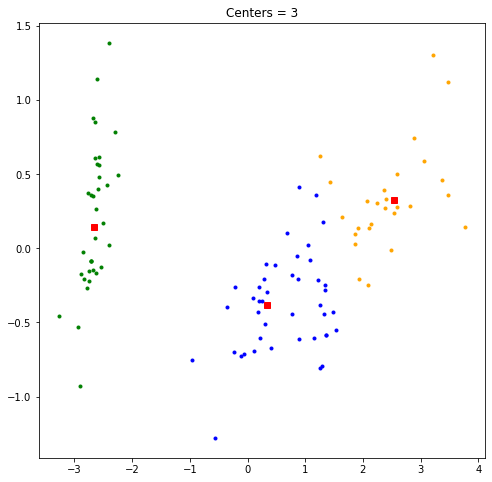

In [59]:
cluster_membership = np.argmax(u, axis=0)
mu0 = mu[0]
max_mu0 = max(mu0)
# First core
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

Text(0.5, 1.0, 'Centers = 3')

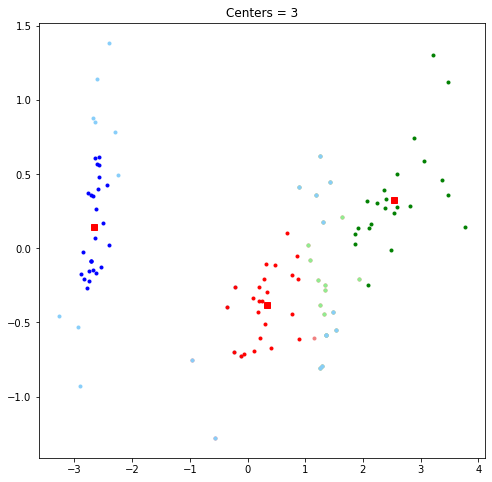

In [60]:
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)

for nc, col in zip(list(range(ncenters)), ['lightcoral', 'lightgreen', 'lightskyblue']):
    mu_i = mu[nc]
    max_mu_i = max(mu_i)
    indices, = np.where((alphas[nc] < mu_i) & (mu_i < (max_mu_i - alphas[nc])))
    ax.plot(xpts[indices],
            ypts[indices], '.', color=col)
    
# Cores
for nc, col in zip(list(range(ncenters)), ['red', 'green', 'blue']):
    mu_i = mu[nc]
    ax.plot(xpts[mu_i >= (1 - alphas[nc])],
            ypts[mu_i >= (1 - alphas[nc])], '.', color=col)


# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

In [61]:
cntr

array([[ 0.33283571, -0.38073722],
       [ 2.53807355,  0.32622603],
       [-2.65877367,  0.1466456 ]])

In [62]:
X_test

array([[ 2.90063883e+00,  2.77544709e-01],
       [ 9.44279295e-01, -1.46382949e-01],
       [ 1.40309849e+00, -1.78236349e-01],
       [ 1.06211964e+00,  2.69642601e-01],
       [ 1.25104248e+00, -1.32760525e-01],
       [ 2.28081746e+00,  1.41391840e-01],
       [ 1.31262631e-01, -8.52014702e-01],
       [-2.87490650e-03, -6.03635596e-01],
       [-2.33951526e+00,  4.09981503e-01],
       [ 1.89478049e+00,  3.49591863e-01],
       [-2.65841464e+00,  1.19873962e+00],
       [-3.02655268e+00, -4.34196823e-01],
       [ 2.27903255e+00, -3.12050325e-01],
       [ 1.91186556e+00,  8.50183693e-03],
       [-2.66992680e+00,  3.39350322e-01],
       [ 1.86454273e+00,  1.18545229e-01],
       [-8.05212809e-01, -9.93871357e-01],
       [-2.53168052e+00,  6.77068917e-01],
       [-2.33702780e+00,  1.28771266e-01],
       [-2.22005371e+00,  8.93664908e-01],
       [ 6.05676535e-01, -1.39702759e-02],
       [-2.66011437e+00,  2.03964324e-01],
       [ 8.69869134e-01,  2.78413066e-01],
       [ 2.

In [63]:
ncenters = 3
mu, cntr, alphas = srfcm_predict(X_test, 3, cntr)
mu, cntr, alphas

0
[[ 2.90063883e+00  2.77544709e-01]
 [ 9.44279295e-01 -1.46382949e-01]
 [ 1.40309849e+00 -1.78236349e-01]
 [ 1.06211964e+00  2.69642601e-01]
 [ 1.25104248e+00 -1.32760525e-01]
 [ 2.28081746e+00  1.41391840e-01]
 [ 1.31262631e-01 -8.52014702e-01]
 [-2.87490650e-03 -6.03635596e-01]
 [-2.33951526e+00  4.09981503e-01]
 [ 1.89478049e+00  3.49591863e-01]
 [-2.65841464e+00  1.19873962e+00]
 [-3.02655268e+00 -4.34196823e-01]
 [ 2.27903255e+00 -3.12050325e-01]
 [ 1.91186556e+00  8.50183693e-03]
 [-2.66992680e+00  3.39350322e-01]
 [ 1.86454273e+00  1.18545229e-01]
 [-8.05212809e-01 -9.93871357e-01]
 [-2.53168052e+00  6.77068917e-01]
 [-2.33702780e+00  1.28771266e-01]
 [-2.22005371e+00  8.93664908e-01]
 [ 6.05676535e-01 -1.39702759e-02]
 [-2.66011437e+00  2.03964324e-01]
 [ 8.69869134e-01  2.78413066e-01]
 [ 2.31103583e+00 -7.23011124e-02]
 [ 1.12836471e+00 -1.76170468e-01]
 [ 9.00979958e-01  2.91441197e-01]
 [ 5.39464328e-01 -4.61018608e-01]
 [-7.60239938e-01 -1.01250938e+00]
 [ 6.14707890e-01 

(array([[1.86093868e-02, 8.41771969e-01, 5.43311159e-01, 6.63761128e-01,
         6.47935766e-01, 2.39810301e-02, 9.37641156e-01, 9.58313229e-01,
         2.14253994e-02, 1.20222079e-01, 8.51109477e-02, 3.96172809e-02,
         1.09329746e-01, 1.54074808e-01, 3.88708283e-03, 1.57446555e-01,
         6.74694570e-01, 3.05778286e-02, 1.38014580e-02, 8.19519830e-02,
         9.31239183e-01, 3.53312370e-04, 7.59000926e-01, 4.94656145e-02,
         7.41862680e-01, 7.40782857e-01, 9.84943530e-01, 6.90641088e-01,
         9.73783917e-01, 5.66907958e-03, 3.94254108e-01, 1.36012374e-01,
         8.23231161e-01, 6.45749045e-04, 3.05266519e-01, 4.43580439e-03,
         2.75669582e-02, 1.22068733e-02, 6.90533484e-03, 3.54750175e-01,
         9.77785724e-01, 2.58456368e-02, 8.68008207e-01, 2.50157756e-01,
         7.22332266e-01],
        [9.77161977e-01, 1.30607637e-01, 4.17866381e-01, 2.90511339e-01,
         3.13917116e-01, 9.72021489e-01, 3.43059065e-02, 2.12559314e-02,
         6.99240887e-03, 

Text(0.5, 1.0, 'Centers = 3')

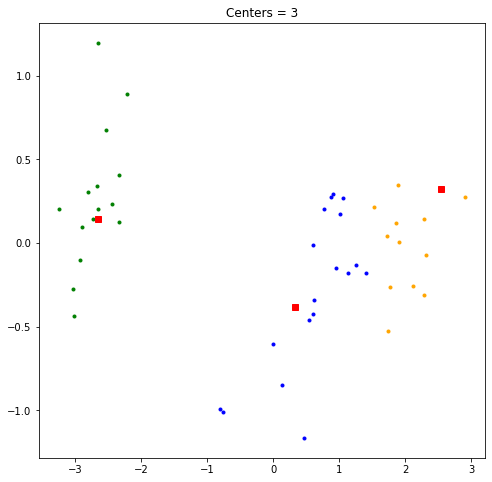

In [64]:
cluster_membership = np.argmax(mu, axis=0)
mu0 = mu[0]
max_mu0 = max(mu0)
# First core
xpts = np.array(X_test)[:,0]
ypts = np.array(X_test)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)
for j in range(ncenters):
    ax.plot(xpts[cluster_membership == j],
            ypts[cluster_membership == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

In [65]:
srfcm = SRFCM(c=3)
srfcm.fit(X_train, y_train)

In [66]:
mu, cntr, alphas = srfcm.predict(X_train)

Text(0.5, 1.0, 'Centers = 3')

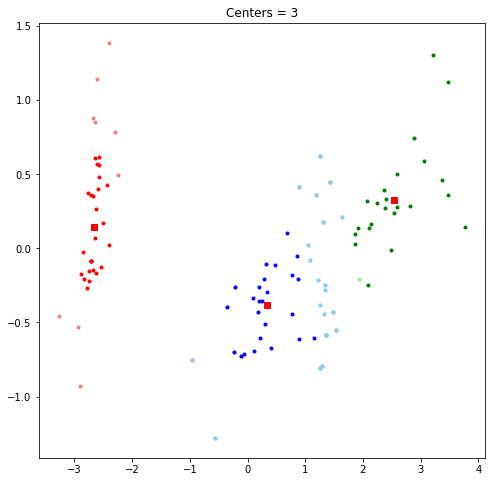

In [67]:
xpts = np.array(X_train)[:,0]
ypts = np.array(X_train)[:,1]
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
fig1, ax = plt.subplots(1, 1, figsize=(8, 8))

cluster_membership = np.argmax(mu, axis=0)

for nc, col in zip(list(range(ncenters)), ['lightcoral', 'lightgreen', 'lightskyblue']):
    mu_i = mu[nc]
    max_mu_i = max(mu_i)
    indices, = np.where((alphas[nc] < mu_i) & (mu_i < (max_mu_i - alphas[nc])))
    ax.plot(xpts[indices],
            ypts[indices], '.', color=col)
    
# Cores
for nc, col in zip(list(range(ncenters)), ['red', 'green', 'blue']):
    mu_i = mu[nc]
    ax.plot(xpts[mu_i >= (1 - alphas[nc])],
            ypts[mu_i >= (1 - alphas[nc])], '.', color=col)


# Mark the center of each fuzzy cluster
for pt in cntr:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}'.format(ncenters))

# MSRFCM

In [ ]:
def compute_thresholds_msrfcm(mu, c):
    alphas = []
    for i in range(c):
        mu_i = mu[i]
        feasible_alphas = np.linspace(np.min(mu_i), (np.min(mu_i) + np.max(mu_i)) / 2, 100)
        min_O = np.inf
        alpha_i = np.inf
        max_mu_i = max(mu_i)
        for feasible_alpha in feasible_alphas:
            sum_less = sum([mu_ik for mu_ik in mu_i if mu_ik <= feasible_alpha])
            sum_greater = sum([1 - mu_ik for mu_ik in mu_i if mu_ik >= (max_mu_i - feasible_alpha)])
            res = abs(sum_less + sum_greater - len([1 for mu_ik in mu_i if feasible_alpha < mu_ik < (max_mu_i - feasible_alpha)]))
            print(i, feasible_alpha, res, min_O)
            if res < min_O:
                min_O = res
                alpha_i = feasible_alpha
        alphas.append(lambda_i)
    return alphas 


def update_centers_msrfcm(v_m1, v_m2, beta1, beta2, c):
    new_v = np.zeros(shape=(c, v_m1.shape[1]))
    for i in range(c):
        for j in range(v_m1.shape[1]):
            new_v[i][j] = beta1 * v_m1[i][j] + beta2 * v_m2[i][j]
    return new_v


def compute_boundaries_msrfcm():
    raise NotImplementedError

def msrfcm(X, c, m1=2, m2=4, epsilon=0.005, n_iter=1000, wl=0.95, wb=0.05, beta1=0.25, beta2=0.75):
    mu1 = np.random.rand(c, X.shape[0])
    mu1 = mu1 / np.sum(mu1, axis=0, keepdims=1)
    mu2 = np.random.rand(c, X.shape[0])
    centers = find_centers(X, mu1, m1, c)
    
    for l in range(n_iter):
        print(l)
        new_mu1 = update_mu(X, m1, c, centers)
        new_mu2 = update_mu(X, m2, c, centers)
        
        alphas_m1 = compute_thresholds_msrfcm(new_mu1, c)
        alphas_m2 = compute_thresholds_msrfcm(new_mu2, c)
        
        lower_bounds_m1, boundary_regions_m1 = compute_bounds(X, new_mu1, c, alphas_m1)
        lower_bounds_m2, boundary_regions_m2 = compute_bounds(X, new_mu2, c, alphas_m2)
        
        v_m1 = compute_prototypes(X, new_mu1, c, m1, lower_bounds_m1, boundary_regions_m1, wl, wb)
        v_m2 = compute_prototypes(X, new_mu2, c, m2, lower_bounds_m2, boundary_regions_m2, wl, wb)
        
        centers = update_centers_msrfcm(v_m1, v_m2, beta1, beta2, c)
        
        if np.linalg.norm(mu - new_mu) < epsilon:
            break
        mu = new_mu
            
    return new_mu, centers, alphas